In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd
from typing import Literal
from tqdm import tqdm

from openff.toolkit.topology import Molecule
from openff.toolkit.topology import Topology
from openff.toolkit.typing.engines.smirnoff import ForceField
from openff.interchange.components.interchange import Interchange
from openff import units

from dataclasses import dataclass

POTENTIAL_KEYS = Literal["Bonds", "Angles", "ProperTorsions", "ImproperTorsions", "vdW", "Electrostatics"]

DEPRECATION: --no-python-version-warning is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to remove the flag as it's a no-op. Discussion can be found at https://github.com/pypa/pip/issues/13154


In [3]:
pot_types_and_param_keys = {"Bonds": ["length", "k"],
                            "Angles": ["angle", "k"],
                            "ProperTorsions": ["k1", "k2", "k3", "k4", "phase1", "phase2", "phase3", "phase4"],
                            "ImproperTorsions": ["k1", "phase1"],
                            }

def plot_all_ffs(output_data: OutputData, plot_type: Literal["values", "differences"]) -> tuple[plt.Figure, plt.Axes]:
    
    plt_fn = plot_ff_values if plot_type == "values" else plot_ff_differences
    extra_args = {"iterations": (0, output_data.n_iter-1)} if plot_type == "differences" else {}

    # 1 column per potential type
    ncols = len(pot_types_and_param_keys)
    # 1 row for each of the greatest number of parameters
    nrows = max([len(v) for v in pot_types_and_param_keys.values()])
    fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5))

    for i, (potential_type, param_keys) in tqdm(enumerate(pot_types_and_param_keys.items()), total=len(pot_types_and_param_keys)):
        for j, param_key in enumerate(param_keys):
            plt_fn(fig, axs[j, i], output_data, potential_type, param_key, **extra_args)

        # Hide the remaining axes
        for k in range(j+1, nrows):
            axs[k, i].axis("off")

    axs[2, 3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    fig.tight_layout()

    return fig, axs


NameError: name 'OutputData' is not defined

In [20]:
from openff.toolkit import ForceField

pot_types_and_param_keys = {"Bonds": ["length", "k"],
                            "Angles": ["angle", "k"],
                            "ProperTorsions": ["k1", "k2", "k3", "k4", "phase1", "phase2", "phase3", "phase4"],
                            "ImproperTorsions": ["k1", "phase1"],
                            }

def plot_parameters(fig: plt.Figure, ax: plt.Axes, force_field: ForceField,  potential_type: str, parameter_key: str) -> dict[str, float]:
    """
    Plot the parameters for a given parameter key.
    """
    # Convert to dicts with the id as the key
    objects = force_field.get_parameter_handler(potential_type).parameters
    potentials = {p.id: p.to_dict() for p in objects}

    parameter_keys = [k for k in potentials[list(potentials.keys())[0]].keys() if k not in ["smirks", "id"]]
    print(f"Parameter keys: {parameter_keys}")
    if parameter_key not in parameter_keys:
        raise ValueError(f"Parameter key {parameter_key} not found in {parameter_keys}")

    
    # Get the differences for each key id
    vals = {key: potentials[key][parameter_key] for key in potentials.keys()}
    vals_first_key = list(vals.keys())[0]

    # Plot the differences
    q_units = units.unit.degrees if potential_type == "Angles" and parameter_key == "angle" else vals[vals_first_key].units
    ax.bar(
        vals.keys(),
        [float(vals[k] / q_units ) for k in vals.keys()],
    )

    ax.set_ylabel(f"{parameter_key} / {q_units}")
    ax.set_xlabel("Key ID")
    ax.set_title(f"{potential_type} {parameter_key}")

def plot_forcefield(force_field: ForceField) -> tuple[plt.Figure, plt.Axes]:
    """
    Plot the forcefield parameters for a given forcefield.
    """
    # 1 column per potential type
    ncols = len(pot_types_and_param_keys)
    # 1 row for each of the greatest number of parameters
    nrows = max([len(v) for v in pot_types_and_param_keys.values()])
    fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5))

    for i, (potential_type, param_keys) in tqdm(enumerate(pot_types_and_param_keys.items()), total=len(pot_types_and_param_keys)):
        for j, param_key in enumerate(param_keys):
            print(f"Plotting {potential_type} {param_key}")
            plot_parameters(fig, axs[j, i], force_field, potential_type, param_key)

        # Hide the remaining axes
        for k in range(j+1, nrows):
            axs[k, i].axis("off")

    axs[2, 3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    fig.tight_layout()

    return fig, axs

In [21]:
ff_names = [#"spice-2-lj-sage-2-2-msm-expanded-torsions",
            #"lj-sage-msm-0-torsions-linear-harm-trained-1000-epoch-spice2", 
            "../output_ff/spice2_linearised_harmonics_improper_reg"
           ]
ffs = {name.split("/")[-1]: ForceField(f"../output_ff/{name}.offxml") for name in ff_names}

In [19]:
ff = ffs["spice2_linearised_harmonics_improper_reg"]
ff.get_parameter_handler("length").parameters[0].to_dict()

KeyError: "Cannot find a registered parameter handler class for tag 'length'\nKnown parameter handler class tags are dict_keys(['Constraints', 'Bonds', 'Angles', 'ProperTorsions', 'ImproperTorsions', 'GBSA', 'vdW', 'Electrostatics', 'LibraryCharges', 'ToolkitAM1BCC', 'ChargeIncrementModel', 'VirtualSites'])"

Force field: spice2_linearised_harmonics_improper_reg


  0%|          | 0/4 [00:00<?, ?it/s]

Plotting Bonds length
Parameter keys: ['length', 'k']
Plotting Bonds k
Parameter keys: ['length', 'k']
Plotting Angles angle
Parameter keys: ['angle', 'k']
Plotting Angles k
Parameter keys: ['angle', 'k']
Plotting ProperTorsions k1
Parameter keys: ['periodicity1', 'periodicity2', 'periodicity3', 'periodicity4', 'phase1', 'phase2', 'phase3', 'phase4', 'k1', 'k2', 'k3', 'k4', 'idivf1', 'idivf2', 'idivf3', 'idivf4']
Plotting ProperTorsions k2
Parameter keys: ['periodicity1', 'periodicity2', 'periodicity3', 'periodicity4', 'phase1', 'phase2', 'phase3', 'phase4', 'k1', 'k2', 'k3', 'k4', 'idivf1', 'idivf2', 'idivf3', 'idivf4']
Plotting ProperTorsions k3
Parameter keys: ['periodicity1', 'periodicity2', 'periodicity3', 'periodicity4', 'phase1', 'phase2', 'phase3', 'phase4', 'k1', 'k2', 'k3', 'k4', 'idivf1', 'idivf2', 'idivf3', 'idivf4']
Plotting ProperTorsions k4
Parameter keys: ['periodicity1', 'periodicity2', 'periodicity3', 'periodicity4', 'phase1', 'phase2', 'phase3', 'phase4', 'k1', 'k2',

100%|██████████| 4/4 [00:00<00:00,  5.27it/s]

Plotting ProperTorsions phase3
Parameter keys: ['periodicity1', 'periodicity2', 'periodicity3', 'periodicity4', 'phase1', 'phase2', 'phase3', 'phase4', 'k1', 'k2', 'k3', 'k4', 'idivf1', 'idivf2', 'idivf3', 'idivf4']
Plotting ProperTorsions phase4
Parameter keys: ['periodicity1', 'periodicity2', 'periodicity3', 'periodicity4', 'phase1', 'phase2', 'phase3', 'phase4', 'k1', 'k2', 'k3', 'k4', 'idivf1', 'idivf2', 'idivf3', 'idivf4']
Plotting ImproperTorsions k1
Parameter keys: ['periodicity1', 'phase1', 'k1']
Plotting ImproperTorsions phase1
Parameter keys: ['periodicity1', 'phase1', 'k1']



/tmp/ipykernel_1126933/2237925608.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[2, 3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')


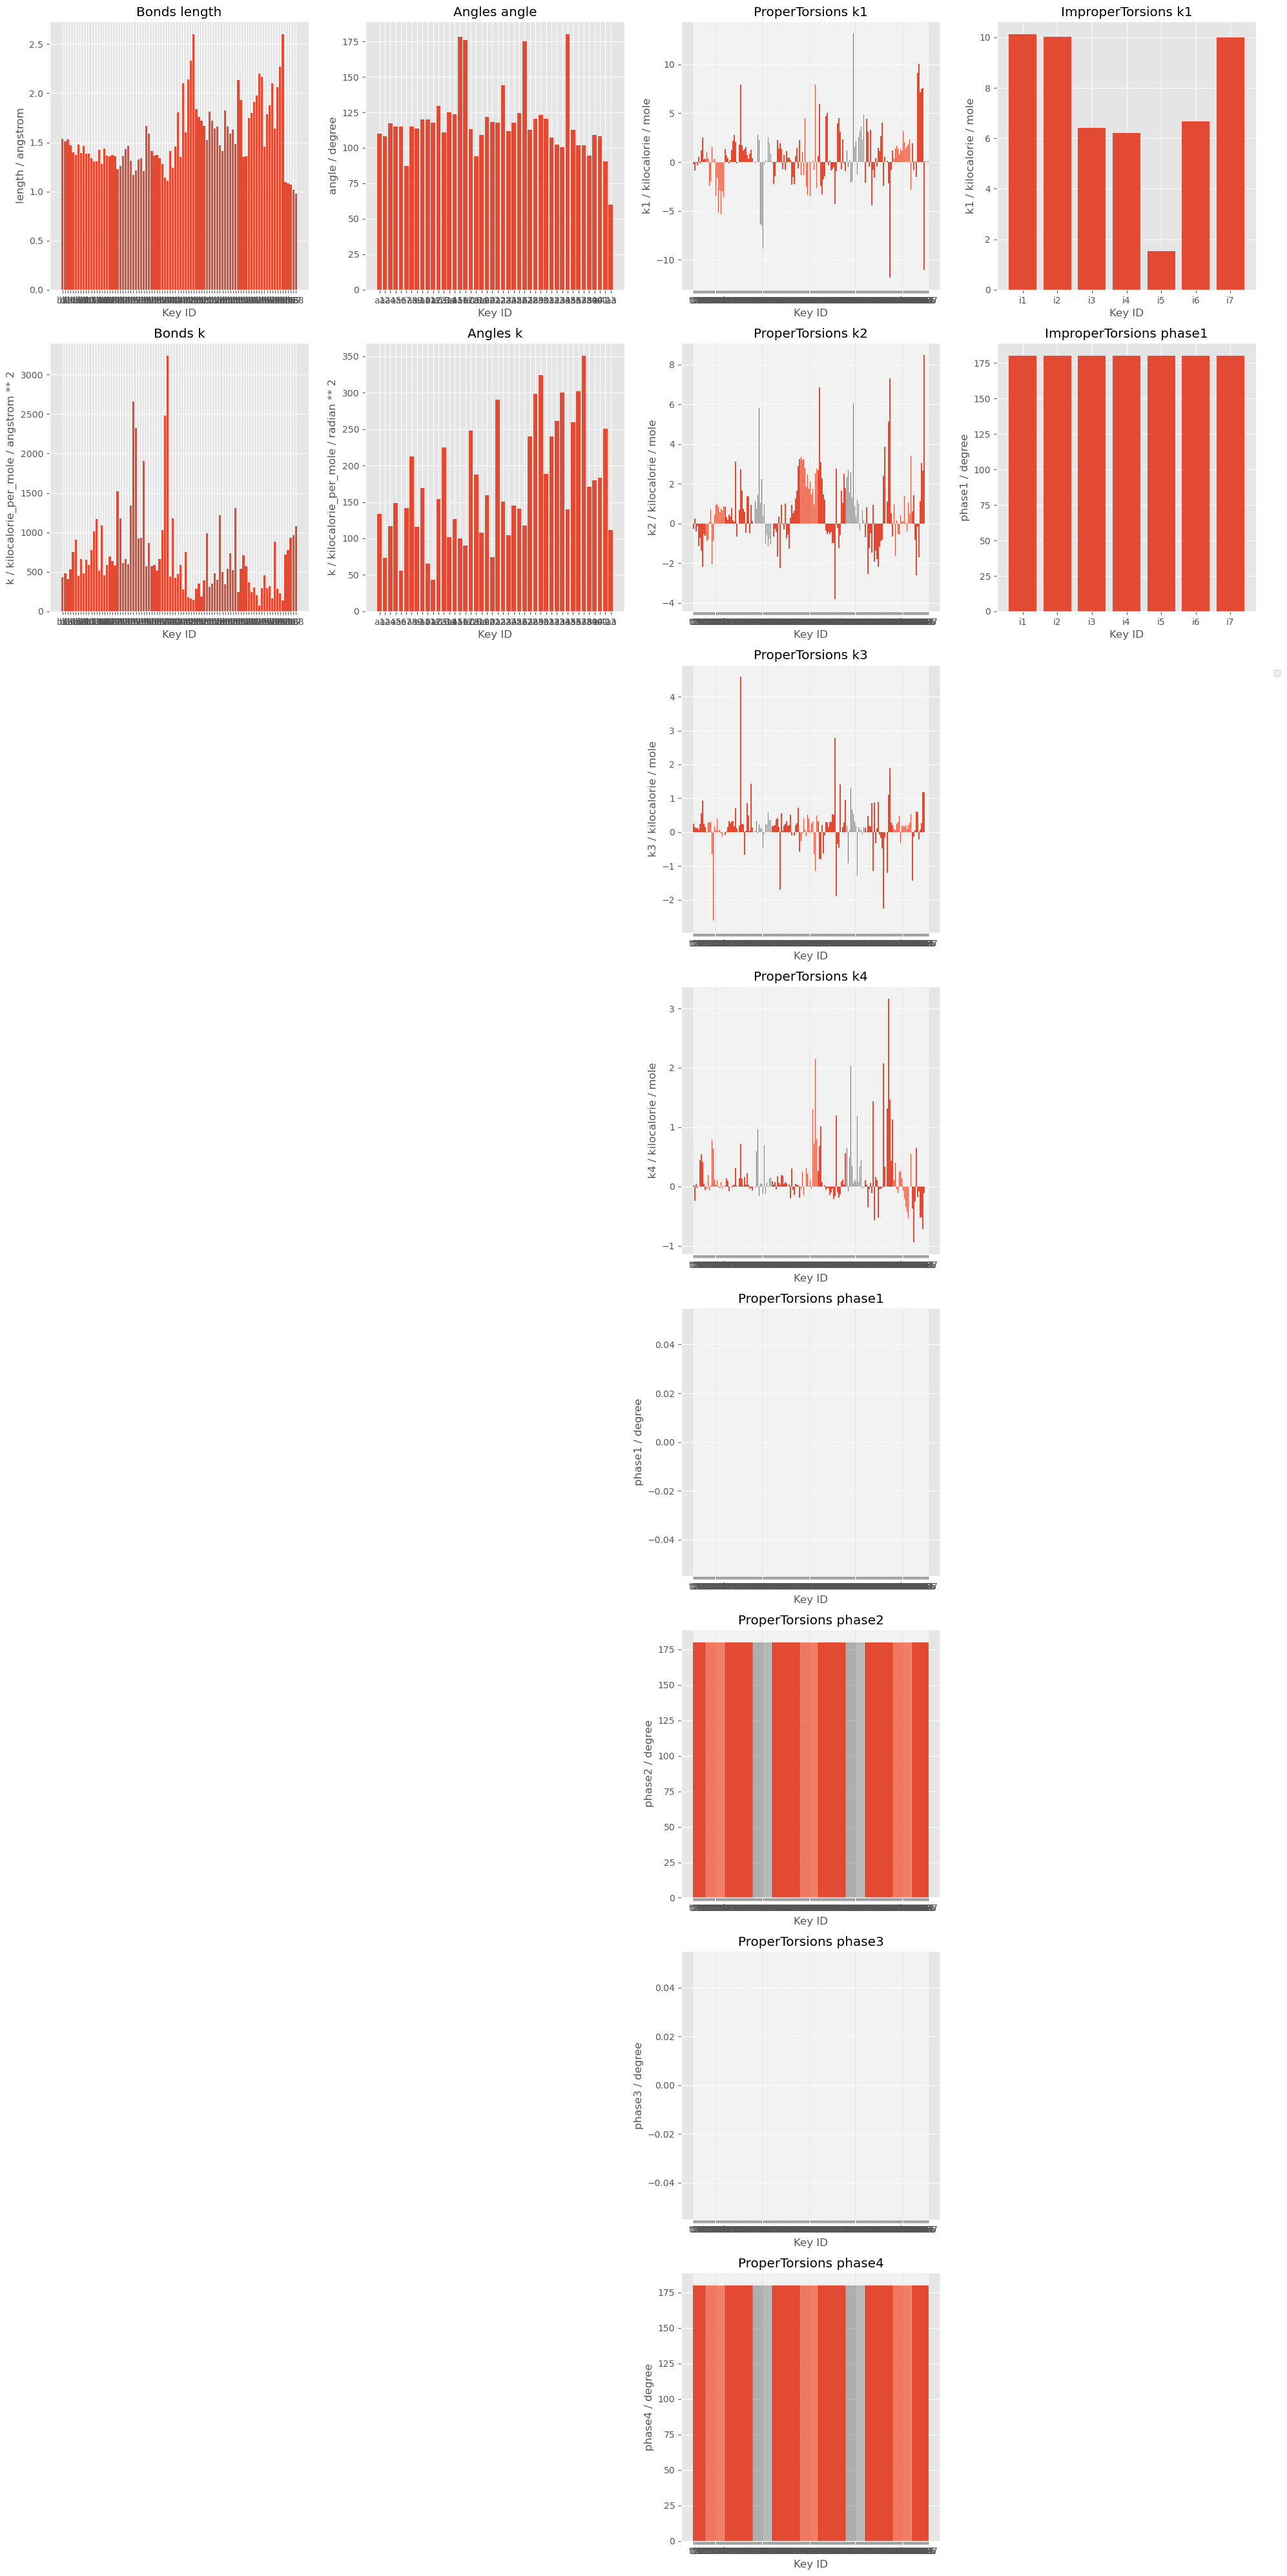

In [22]:
for ff_name, ff in ffs.items():
    print(f"Force field: {ff_name}")
    fig, ax = plot_forcefield(ff)
    fig.savefig(f"{ff_name}.png", dpi=300, bbox_inches='tight')

{'smirks': '[*:1]~[#6X3:2](~[*:3])~[*:4]',
 'periodicity1': 2,
 'phase1': 180.0 <Unit('degree')>,
 'k1': 10.121997171908477 <Unit('kilocalorie / mole')>,
 'id': 'i1'}

 50%|█████     | 2/4 [00:00<00:00, 17.45it/s]

Plotting Bonds length
Plotting Bonds k
Plotting Angles angle
Plotting Angles k
Plotting ProperTorsions k1
Plotting ProperTorsions k2
Plotting ProperTorsions k3
Plotting ProperTorsions k4
Plotting ProperTorsions phase1
Plotting ProperTorsions phase2


 75%|███████▌  | 3/4 [00:00<00:00,  4.60it/s]

Plotting ProperTorsions phase3
Plotting ProperTorsions phase4
Plotting ImproperTorsions k1
Plotting ImproperTorsions k2


ValueError: Parameter key k2 not found in ['periodicity1', 'phase1', 'k1']

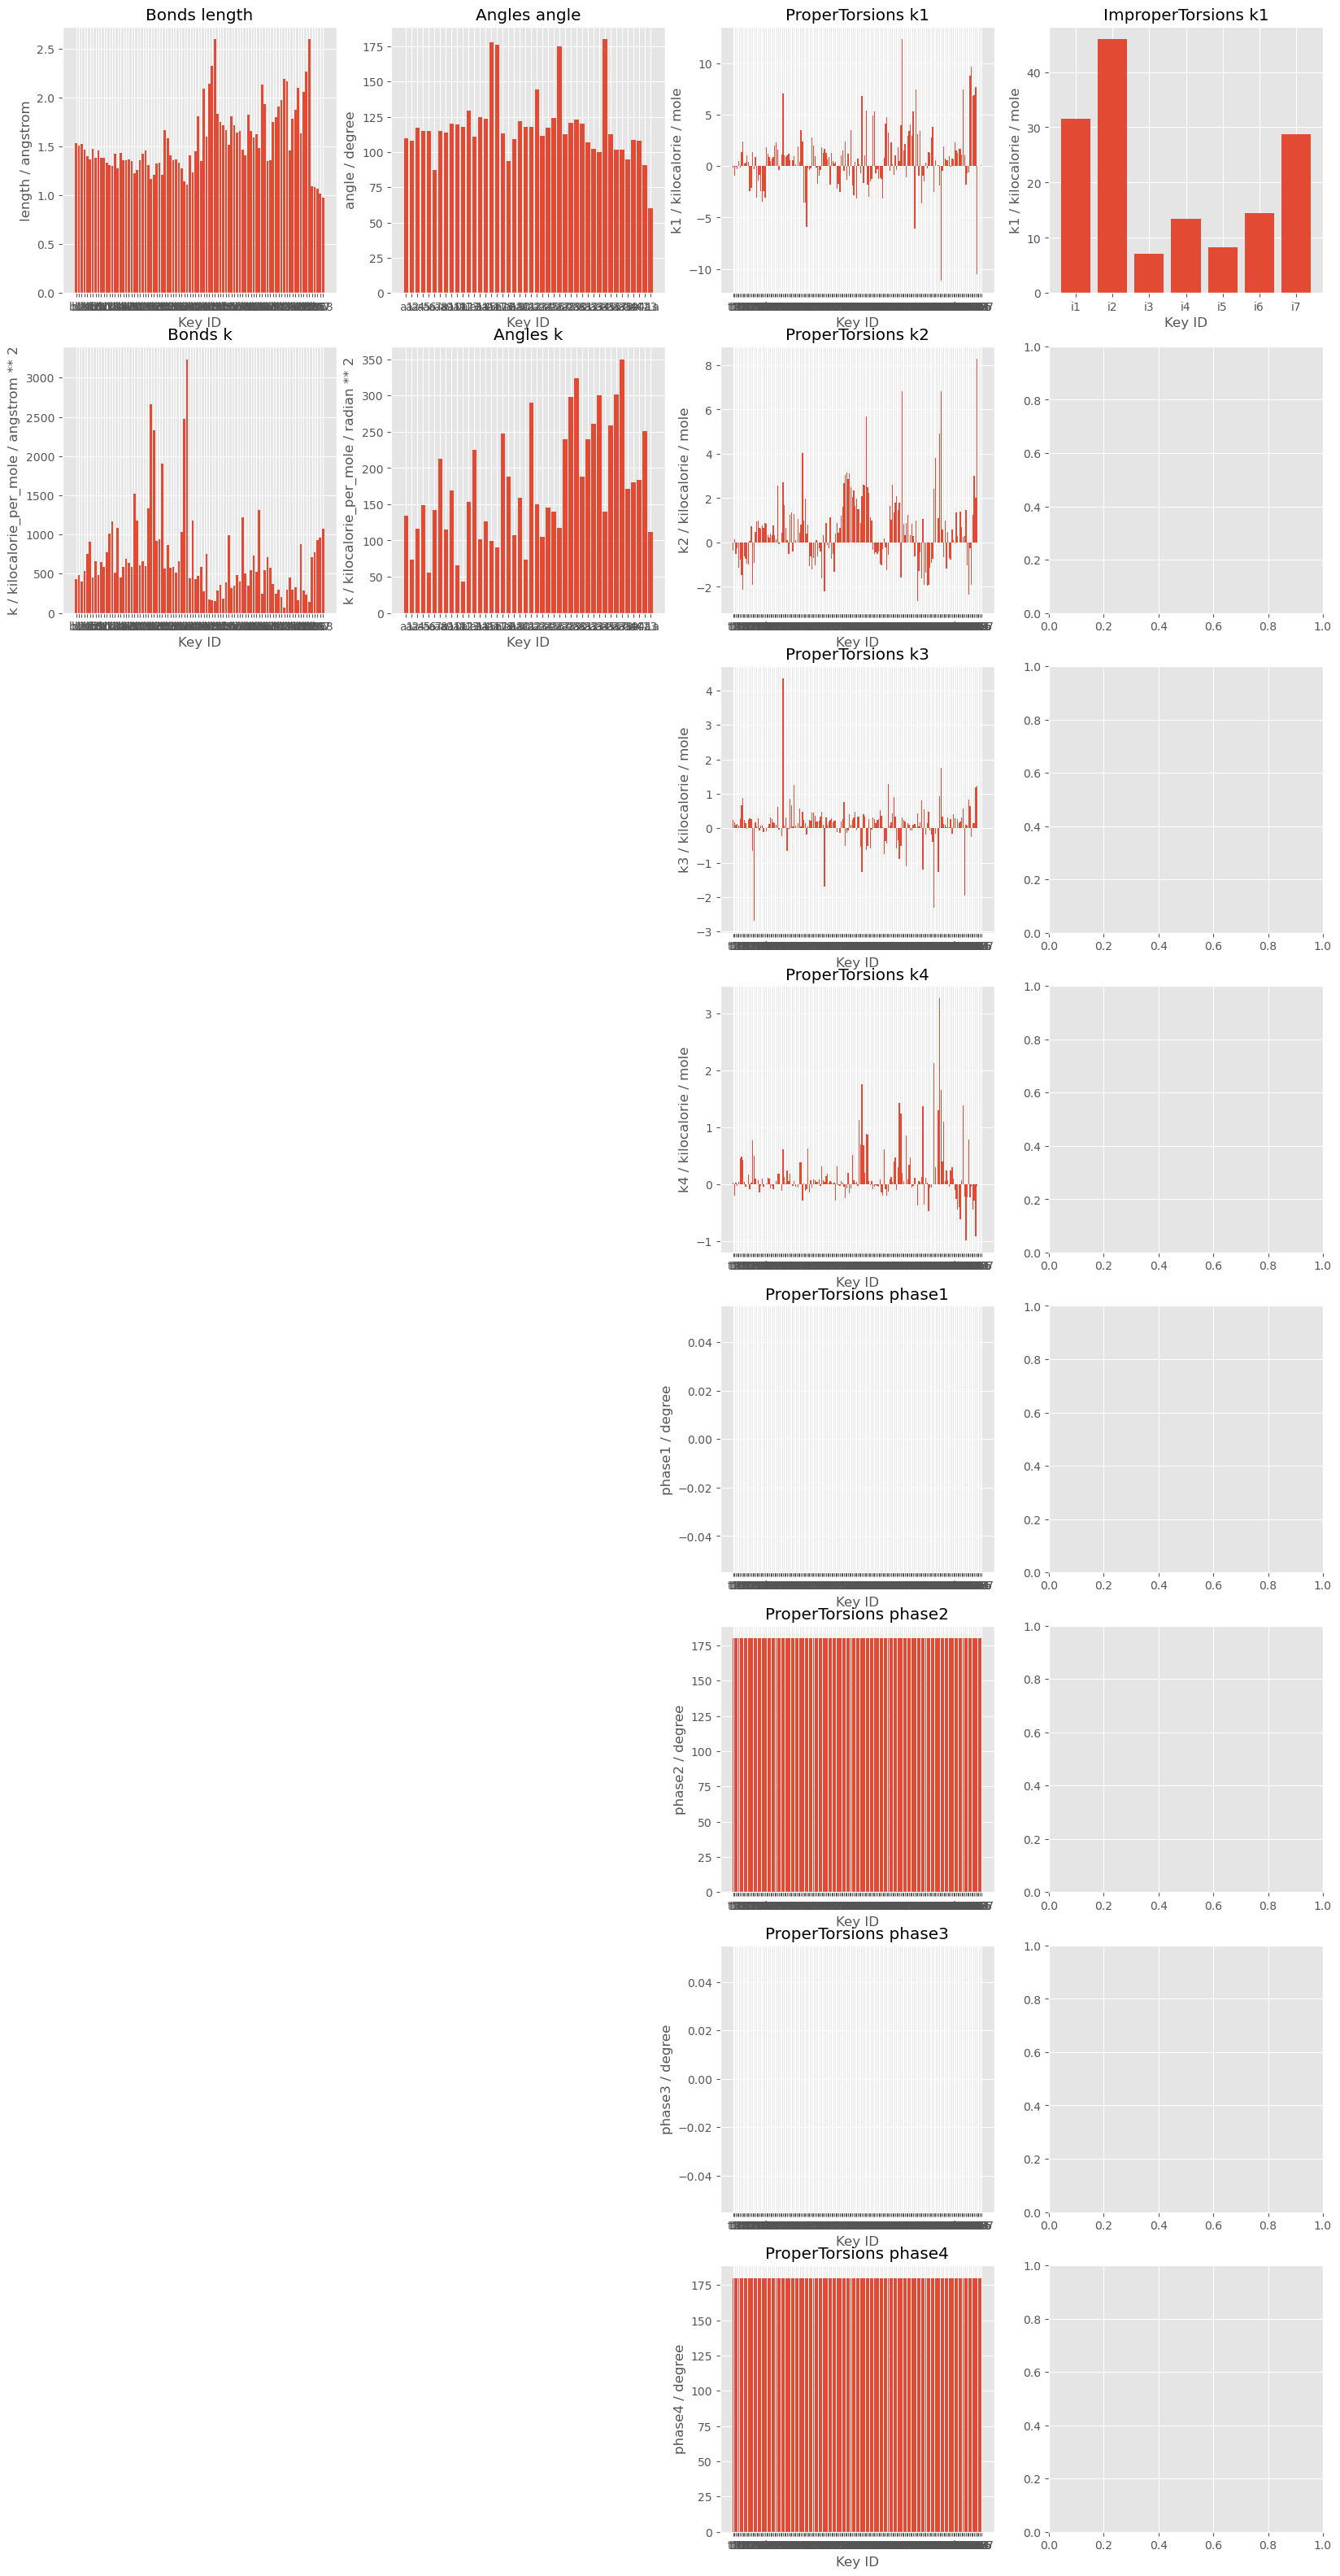

In [15]:
fig, ax = plot_forcefield(ffs["lj-sage-msm-0-torsions-linear-harm-trained-1000-epoch-spice2"])
fig.savefig("spice2-linear-harm.png", dpi=300, bbox_inches='tight')

  0%|          | 0/4 [00:00<?, ?it/s]

 50%|█████     | 2/4 [00:00<00:00, 18.36it/s]

Plotting Bonds length
Plotting Bonds k
Plotting Angles angle
Plotting Angles k
Plotting ProperTorsions k1
Plotting ProperTorsions k2
Plotting ProperTorsions k3
Plotting ProperTorsions k4
Plotting ProperTorsions phase1
Plotting ProperTorsions phase2


100%|██████████| 4/4 [00:00<00:00,  6.51it/s]

Plotting ProperTorsions phase3
Plotting ProperTorsions phase4
Plotting ImproperTorsions k1
Plotting ImproperTorsions phase1



/tmp/ipykernel_3984500/2641862111.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[2, 3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')


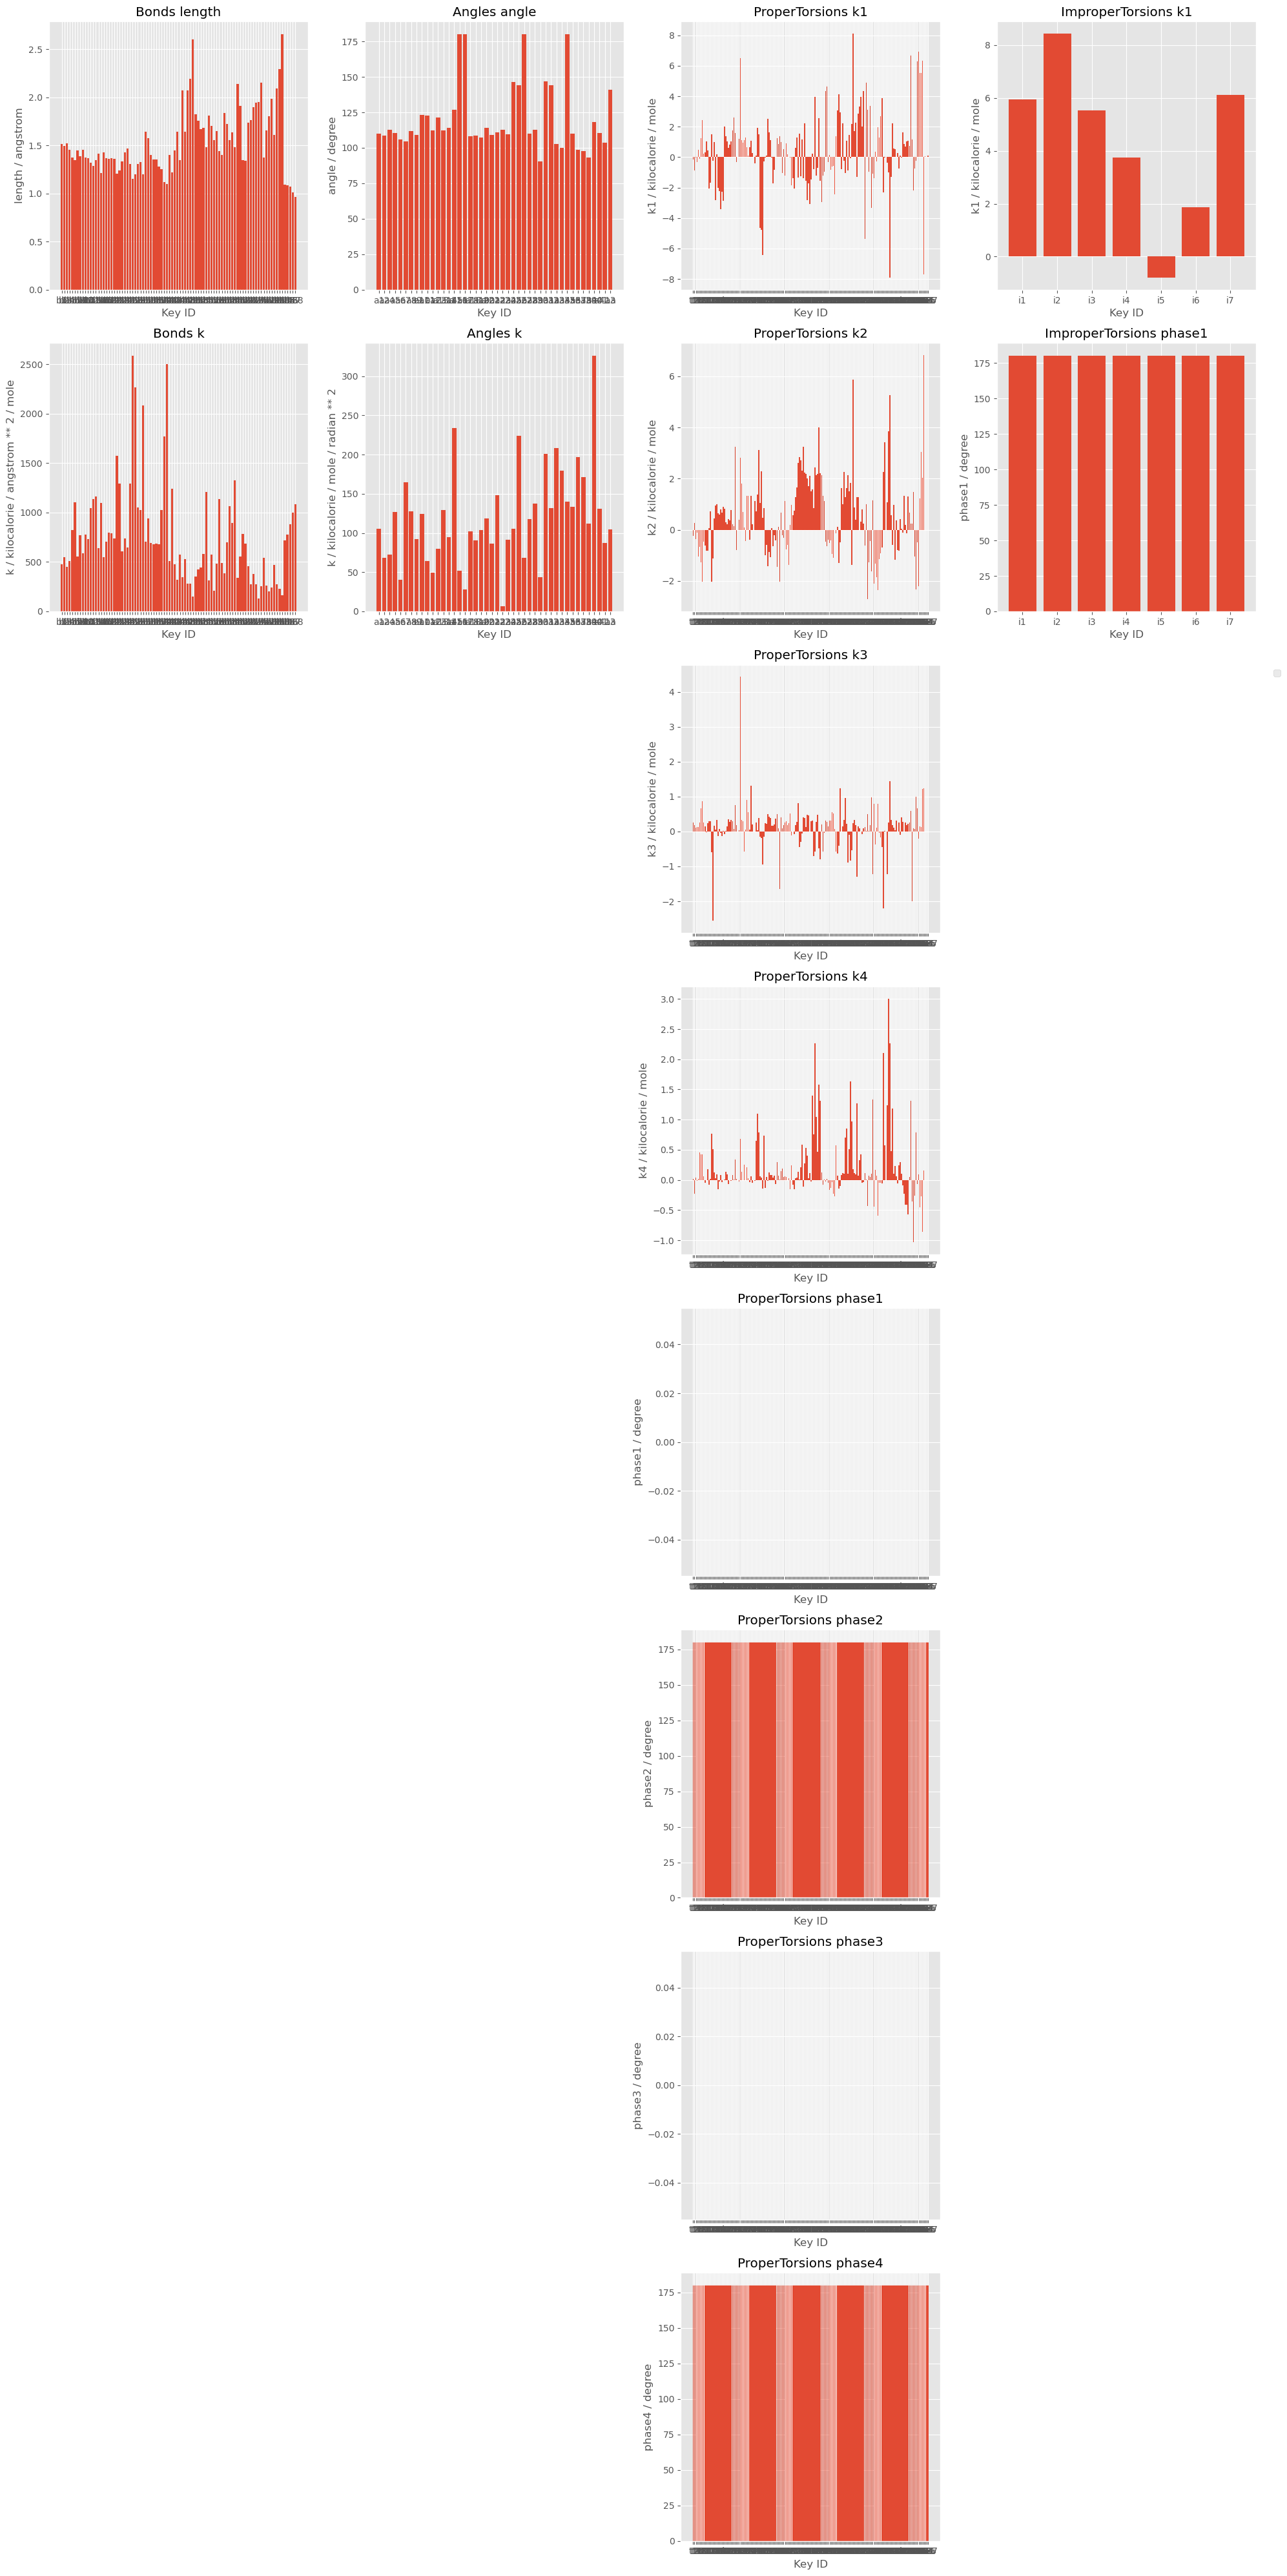

In [ ]:
fig, axs = plot_forcefield(ffs["spice-2-lj-sage-2-2-msm-expanded-torsions"])
fig.savefig("spice2.png", dpi=300, bbox_inches='tight')

In [11]:
ffs["lj-sage-msm-0-torsions-linear-harm-trained-1000-epoch-spice2"].get_parameter_handler("ProperTorsions").parameters[0].to_dict()

{'smirks': '[*:1]-[#6X4:2]-[#6X4:3]-[*:4]',
 'periodicity1': 1,
 'periodicity2': 2,
 'periodicity3': 3,
 'periodicity4': 4,
 'phase1': 0 <Unit('degree')>,
 'phase2': 180 <Unit('degree')>,
 'phase3': 0 <Unit('degree')>,
 'phase4': 180 <Unit('degree')>,
 'id': 't1',
 'k1': -0.15548600621625547 <Unit('kilocalorie / mole')>,
 'k2': -0.3597566424579493 <Unit('kilocalorie / mole')>,
 'k3': 0.239173259548498 <Unit('kilocalorie / mole')>,
 'k4': 0.026435683458267228 <Unit('kilocalorie / mole')>,
 'idivf1': 1.0,
 'idivf2': 1.0,
 'idivf3': 1.0,
 'idivf4': 1.0}

In [12]:
ffs["spice-2-lj-sage-2-2-msm-expanded-torsions"].get_parameter_handler("ProperTorsions").parameters[0].to_dict()

{'smirks': '[*:1]-[#6X4:2]-[#6X4:3]-[*:4]',
 'periodicity1': 1,
 'periodicity2': 2,
 'periodicity3': 3,
 'periodicity4': 4,
 'phase1': 0 <Unit('degree')>,
 'phase2': 180 <Unit('degree')>,
 'phase3': 0 <Unit('degree')>,
 'phase4': 180 <Unit('degree')>,
 'id': 't1',
 'k1': -0.1357821541959824 <Unit('kilocalorie / mole')>,
 'k2': -0.2424485164991627 <Unit('kilocalorie / mole')>,
 'k3': 0.24855607887020978 <Unit('kilocalorie / mole')>,
 'k4': 0.022720696791426433 <Unit('kilocalorie / mole')>,
 'idivf1': 1.0,
 'idivf2': 1.0,
 'idivf3': 1.0,
 'idivf4': 1.0}

In [10]:
ff.get_parameter_handler("Bonds").parameters

[<BondType with smirks: [#6X4:1]-[#6X4:2]  id: b1  length: 1.5336419679745295 angstrom  k: 430.64774307099606 kilocalorie_per_mole / angstrom ** 2  >,
 <BondType with smirks: [#6X4:1]-[#6X3:2]  id: b2  length: 1.5096556062239999 angstrom  k: 478.68524112199657 kilocalorie_per_mole / angstrom ** 2  >,
 <BondType with smirks: [#6X4:1]-[#6X3:2]=[#8X1+0]  id: b3  length: 1.5290188602680752 angstrom  k: 405.189000256771 kilocalorie_per_mole / angstrom ** 2  >,
 <BondType with smirks: [#6X3:1]-[#6X3:2]  id: b4  length: 1.4678363646794739 angstrom  k: 534.937088584369 kilocalorie_per_mole / angstrom ** 2  >,
 <BondType with smirks: [#6X3:1]:[#6X3:2]  id: b5  length: 1.4007957865793168 angstrom  k: 753.6236592477782 kilocalorie_per_mole / angstrom ** 2  >,
 <BondType with smirks: [#6X3:1]=[#6X3:2]  id: b6  length: 1.3731685373335858 angstrom  k: 904.1754390887412 kilocalorie_per_mole / angstrom ** 2  >,
 <BondType with smirks: [#6:1]-[#7:2]  id: b7  length: 1.4773292792809303 angstrom  k: 451.

In [6]:
ff = ffs["spice2"]